This notebook reads in results from a survey conducted through MechanicalTurk asking users to evaluate the quality of our summarization model.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# read in results
results = pd.read_csv('summarization_evaluation_survey_results.csv')
results.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Random ID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Consider the question below.\nWhat is most imp...,"On a scale of 1 to 5, how well does this summa...","In 1-2 sentences, please write your own summar...",Consider the question below.\nWhich countries ...,"On a scale of 1 to 5, how well does this summa...","In 1-2 sentences, please write your own summar...",Consider the question below.\nWhat college ext...,"On a scale of 1 to 5, how well does this summa...","In 1-2 sentences, please write your own summar...",Random ID
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID26""}","{""ImportId"":""QID27""}","{""ImportId"":""QID28_TEXT""}","{""ImportId"":""QID29""}","{""ImportId"":""QID30""}","{""ImportId"":""QID31_TEXT""}","{""ImportId"":""QID32""}","{""ImportId"":""QID33""}","{""ImportId"":""QID34_TEXT""}","{""ImportId"":""Random ID""}"
2,2019-08-03 18:36:37,2019-08-03 18:43:10,IP Address,131.191.3.103,100,392,True,2019-08-03 18:43:10,R_3hnfV7aKZlatWJt,NaN,...,2 - Bad,2 - Bad,It does not give an satisfactory answer to the...,2 - Bad,1 - Very Poor,It is off topic and does not give a satisfacto...,2 - Bad,1 - Very Poor,It does not give a satisfactory answer to the ...,131
3,2019-08-03 18:37:57,2019-08-03 18:51:52,IP Address,75.141.194.130,100,834,True,2019-08-03 18:51:52,R_3O0yh9rJWU88Kow,NaN,...,1 - Very Poor,1 - Very Poor,Make certain that you list projects you've don...,1 - Very Poor,1 - Very Poor,Google teaching positions then use your noodle...,1 - Very Poor,1 - Very Poor,You could volunteer in a hospital visiting pat...,188
4,2019-08-03 18:39:07,2019-08-03 18:56:19,IP Address,50.90.116.4,100,1032,True,2019-08-03 18:56:20,R_1dn5xQls5E9abiy,NaN,...,3 - Fair,3 - Fair,The most important thing is to keep your resum...,2 - Bad,2 - Bad,Many countries have a need for English teacher...,3 - Fair,2 - Bad,It can be helpful to volunteer with charity or...,124


In [41]:
# Separate the scores from the summary quality and the answer quality
# remove the top two rows
summary_df = results[['Q1','Q5','Q11','Q14','Q17','Q20','Q23','Q26','Q29','Q32']]
summary_df.drop([0,1], inplace=True)
summary_df.head()

,Q1,Q5,Q11,Q14,Q17,Q20,Q23,Q26,Q29,Q32
2,1 - Very Poor,2 - Bad,2 - Bad,2 - Bad,1 - Very Poor,1 - Very Poor,1 - Very Poor,2 - Bad,2 - Bad,2 - Bad
3,2 - Bad,1 - Very Poor,3 - Fair,1 - Very Poor,2 - Bad,2 - Bad,2 - Bad,1 - Very Poor,1 - Very Poor,1 - Very Poor
4,2 - Bad,2 - Bad,4 - Good,2 - Bad,2 - Bad,2 - Bad,2 - Bad,3 - Fair,2 - Bad,3 - Fair
5,2 - Bad,3 - Fair,3 - Fair,2 - Bad,2 - Bad,1 - Very Poor,1 - Very Poor,3 - Fair,2 - Bad,1 - Very Poor
6,1 - Very Poor,1 - Very Poor,3 - Fair,2 - Bad,3 - Fair,4 - Good,3 - Fair,1 - Very Poor,1 - Very Poor,1 - Very Poor


In [42]:
answers_df = results[['Q2','Q6','Q12','Q15','Q18','Q21','Q24','Q27','Q30','Q33']]
answers_df.drop([0,1], inplace=True)
answers_df.head()

,Q2,Q6,Q12,Q15,Q18,Q21,Q24,Q27,Q30,Q33
2,2 - Bad,2 - Bad,2 - Bad,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor,2 - Bad,1 - Very Poor,1 - Very Poor
3,2 - Bad,1 - Very Poor,3 - Fair,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor
4,2 - Bad,2 - Bad,4 - Good,2 - Bad,2 - Bad,2 - Bad,2 - Bad,3 - Fair,2 - Bad,2 - Bad
5,2 - Bad,1 - Very Poor,3 - Fair,1 - Very Poor,1 - Very Poor,1 - Very Poor,1 - Very Poor,2 - Bad,2 - Bad,1 - Very Poor
6,1 - Very Poor,1 - Very Poor,5 - Excellent,1 - Very Poor,5 - Excellent,5 - Excellent,3 - Fair,1 - Very Poor,1 - Very Poor,1 - Very Poor


In [43]:
#rename the columns in both to correspond to the sample question
rng = range(1,11)
new_cols = ['ques_' + str(i) for i in rng]
summary_df.columns = new_cols
answers_df.columns = new_cols

In [45]:
# parse out only the integer score for each columns
for col in summary_df.columns:
    new_colname = col + '_score'
    summary_df[new_colname] = pd.to_numeric(summary_df[col].str[0])
    answers_df[new_colname] = pd.to_numeric(answers_df[col].str[0])

# drop the original columns
summary_df.drop(columns=new_cols, inplace=True)
answers_df.drop(columns=new_cols, inplace=True)

/Users/lucyxie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/lucyxie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
answers_df.head()

,ques_1_score,ques_2_score,ques_3_score,ques_4_score,ques_5_score,ques_6_score,ques_7_score,ques_8_score,ques_9_score,ques_10_score
2,2,2,2,1,1,1,1,2,1,1
3,2,1,3,1,1,1,1,1,1,1
4,2,2,4,2,2,2,2,3,2,2
5,2,1,3,1,1,1,1,2,2,1
6,1,1,5,1,5,5,3,1,1,1


In [48]:
summary_df.head()

,ques_1_score,ques_2_score,ques_3_score,ques_4_score,ques_5_score,ques_6_score,ques_7_score,ques_8_score,ques_9_score,ques_10_score
2,1,2,2,2,1,1,1,2,2,2
3,2,1,3,1,2,2,2,1,1,1
4,2,2,4,2,2,2,2,3,2,3
5,2,3,3,2,2,1,1,3,2,1
6,1,1,3,2,3,4,3,1,1,1


Now that we have both dataframes cleaned, let's analyze just the summary scores.

In [49]:
summary_df.describe()

,ques_1_score,ques_2_score,ques_3_score,ques_4_score,ques_5_score,ques_6_score,ques_7_score,ques_8_score,ques_9_score,ques_10_score
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,2.652632,2.252632,3.105263,2.263158,2.642105,2.042105,1.968421,2.357895,2.105263,2.010526
std,1.173904,1.296217,1.134317,1.265000,1.175239,1.184257,1.267034,1.279260,1.143657,1.233355
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Building plots for the presentation

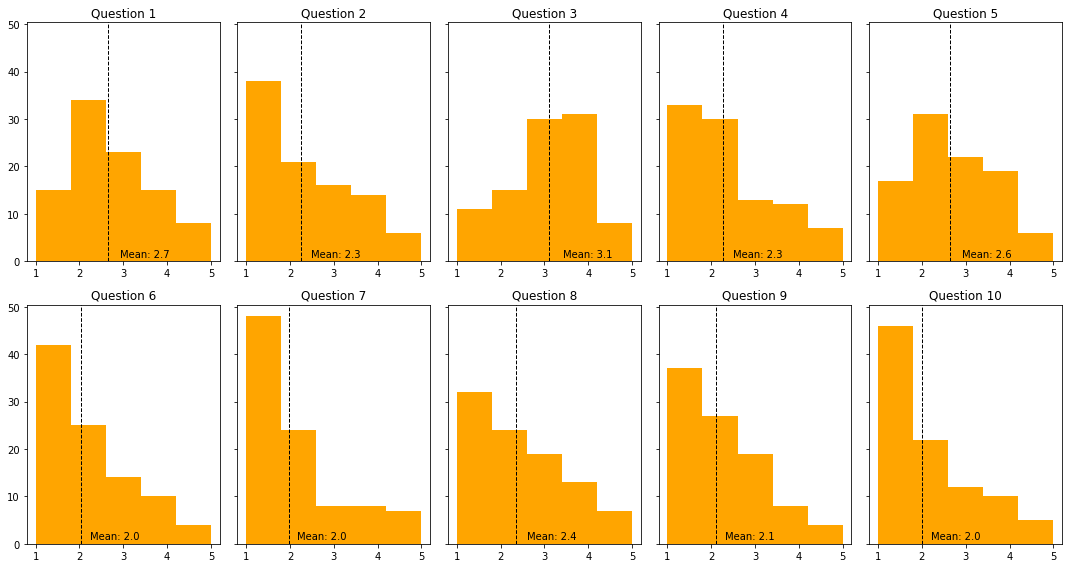

In [81]:
n_bins=5
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize = (15,8))

# plot each question's score histogram
col = 1
_, max_ = plt.ylim()
for i in range(0,2):
    for j in range(0,5):
        x = summary_df['ques_'+str(col)+'_score']
        # plot histogram
        axs[i][j].hist(x, bins=n_bins, color='orange')
        # set title
        axs[i][j].set_title('Question ' + str(col))
        # add mean line and label
        axs[i][j].axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axs[i][j].text(x.mean() + x.mean()/10, max_ - max_/10, 'Mean: {:.1f}'.format(x.mean()))
        col+=1

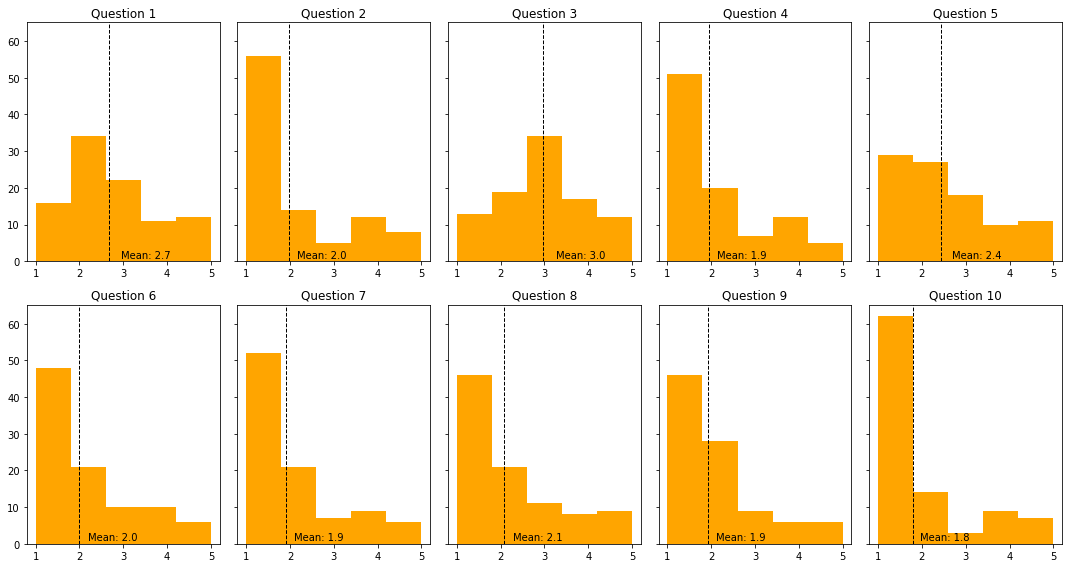

In [82]:
n_bins=5
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize = (15,8))

# plot each question's score histogram
col = 1
_, max_ = plt.ylim()
for i in range(0,2):
    for j in range(0,5):
        x = answers_df['ques_'+str(col)+'_score']
        # plot histogram
        axs[i][j].hist(x, bins=n_bins, color='orange')
        # set title
        axs[i][j].set_title('Question ' + str(col))
        # add mean line and label
        axs[i][j].axvline(x.mean(), color='k', linestyle='dashed', linewidth=1)
        axs[i][j].text(x.mean() + x.mean()/10, max_ - max_/10, 'Mean: {:.1f}'.format(x.mean()))
        col+=1

In [91]:
# get overall mean scores
print("Summary score: ", summary_df.mean(axis=None).mean())
print("Answer score: ", answers_df.mean().mean())

Summary score:  2.34
Answer score:  2.1694736842105264
